=== Résumé du Modèle ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_hidden_layer (Conv2D)      │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │       327,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,586 (1.25 MB)

 Trainable params: 328,586 (1.25 MB)

 Non-trainable params: 0 (0.00 B)


=== Informations du Modèle ===
Nombre total de paramètres: 328,586
Nombre de couches: 3
Input shape: (32, 32, 3)
Output shape: (10,)

=== Test du Modèle ===
Shape de l'image de test: (1, 32, 32, 3)
Shape de la prédiction: (1, 10)
Prédiction (probabilités): [0.0911721  0.0966854  0.10873998 0.10873668 0.09572399 0.08174002
 0.11497948 0.06703649 0.09419003 0.14099582]
Classe prédite: 9


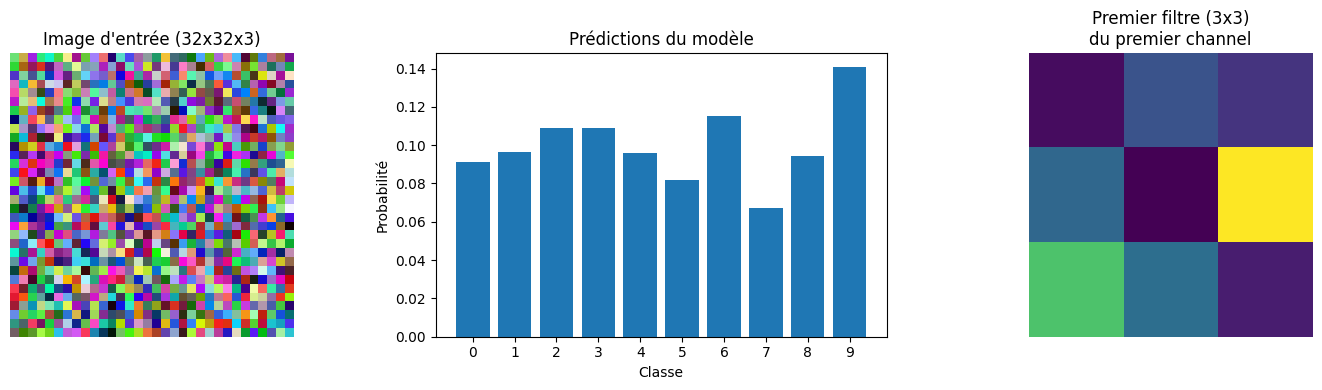


✓ Test complété avec succès!


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Créer un modèle séquentiel
model = keras.Sequential()

# Ajouter une couche convolutionnelle (couche cachée)
# 32 filtres, kernel 3x3, activation ReLU, input shape pour 3 channels
model.add(layers.Conv2D(
    filters=32,
    kernel_size=(3, 3),
    activation='relu',
    padding='same',
    input_shape=(32, 32, 3),
    name='conv_hidden_layer'
))

# Ajouter une couche de sortie (Flatten + Dense pour classification)
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(units=10, activation='softmax', name='output_layer'))

# Afficher le résumé du modèle
print("=== Résumé du Modèle ===")
model.summary()

# Afficher des informations supplémentaires
print("\n=== Informations du Modèle ===")
print(f"Nombre total de paramètres: {model.count_params():,}")
print(f"Nombre de couches: {len(model.layers)}")
print(f"Input shape: (32, 32, 3)")
print(f"Output shape: (10,)")

# Test avec des données aléatoires
print("\n=== Test du Modèle ===")

# Créer une image de test aléatoire (1 image RGB 32x32)
test_image = np.random.rand(1, 32, 32, 3).astype(np.float32)
print(f"Shape de l'image de test: {test_image.shape}")

# Faire une prédiction
prediction = model.predict(test_image, verbose=0)
print(f"Shape de la prédiction: {prediction.shape}")
print(f"Prédiction (probabilités): {prediction[0]}")
print(f"Classe prédite: {np.argmax(prediction[0])}")

# Visualisation
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 1. Afficher l'image d'entrée
axes[0].imshow(test_image[0])
axes[0].set_title("Image d'entrée (32x32x3)")
axes[0].axis('off')

# 2. Afficher les probabilités de sortie
axes[1].bar(range(10), prediction[0])
axes[1].set_xlabel('Classe')
axes[1].set_ylabel('Probabilité')
axes[1].set_title('Prédictions du modèle')
axes[1].set_xticks(range(10))

# 3. Visualiser quelques filtres de la couche convolutionnelle
conv_layer = model.layers[0]
filters = conv_layer.get_weights()[0]
axes[2].imshow(filters[:, :, 0, 0], cmap='viridis')
axes[2].set_title('Premier filtre (3x3)\ndu premier channel')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print("\n✓ Test complété avec succès!")

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Sequential

conv = layers.Conv2D(
    filters=1, kernel_size=(3,3),
    strides=(1,1), padding='valid',
    use_bias=False
)

model = Sequential([layers.Input(shape=(5,5,3)), conv])
laplace = np.array([[0, -1,  0],
                    [-1, 4, -1],
                    [0, -1,  0]], dtype=np.float32)

kernel = np.zeros((3,3,3,1), dtype=np.float32)
for c in range(3):
    kernel[:, :, c, 0] = laplace  # même noyau pour R, G, B

conv.set_weights([kernel])
x = np.random.rand(1, 5, 5, 3).astype(np.float32)

y = model(x).numpy()
print("Output (feature map) shape:", y.shape)
feature_map = y[0, :, :, 0]  # 3x3
feature_map

Output (feature map) shape: (1, 3, 3, 1)


array([[ 1.485466  , -1.7569295 ,  0.28481793],
       [ 0.5609765 ,  1.0712867 ,  1.3709512 ],
       [ 0.4467442 , -0.81318164, -0.41527867]], dtype=float32)

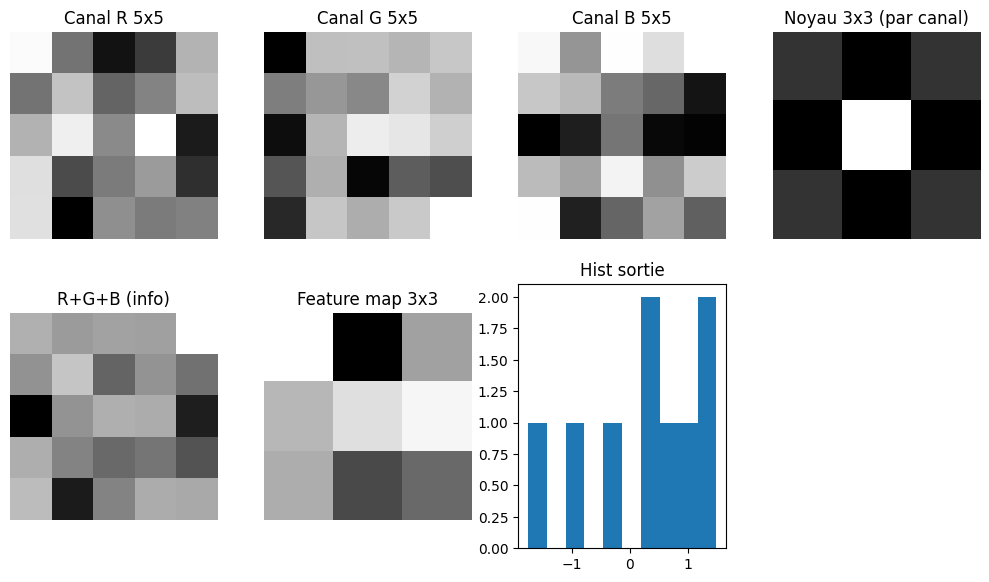

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))

R = x[0, :, :, 0]
G = x[0, :, :, 1]
B = x[0, :, :, 2]

# Entrées (R,G,B)
plt.subplot(2,4,1); plt.imshow(R, cmap='gray'); plt.title('Canal R 5x5'); plt.axis('off')
plt.subplot(2,4,2); plt.imshow(G, cmap='gray'); plt.title('Canal G 5x5'); plt.axis('off')
plt.subplot(2,4,3); plt.imshow(B, cmap='gray'); plt.title('Canal B 5x5'); plt.axis('off')

plt.subplot(2,4,4); plt.imshow(laplace, cmap='gray'); plt.title('Noyau 3x3 (par canal)'); plt.axis('off')

# Sortie (feature map 3x3)
plt.subplot(2,4,6); plt.imshow(feature_map, cmap='gray'); plt.title('Feature map 3x3'); plt.axis('off')

plt.subplot(2,4,5); plt.imshow(R+G+B, cmap='gray'); plt.title('R+G+B (info)'); plt.axis('off')

plt.subplot(2,4,7); plt.hist(feature_map.ravel()); plt.title('Hist sortie');

plt.tight_layout()
plt.show()

TensorFlow: 2.19.0
Input shape: (1, 5, 5, 3)
Output shape: (1, 3, 3, 1)


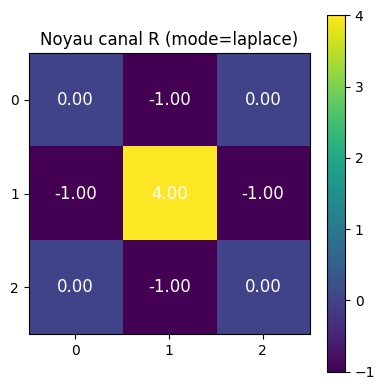

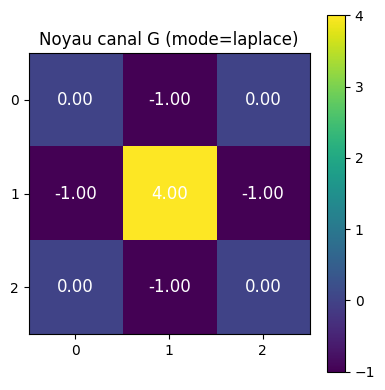

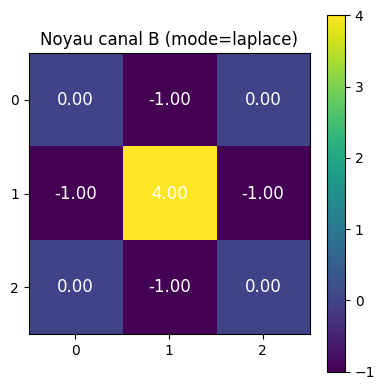

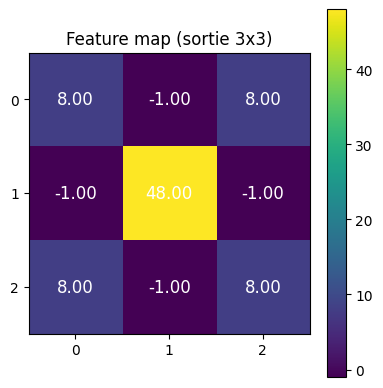

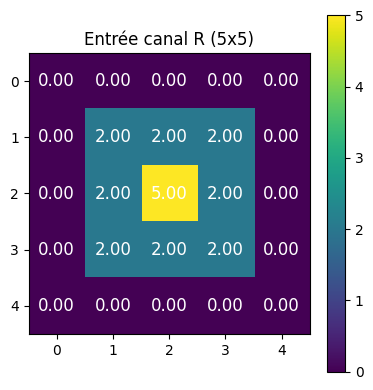

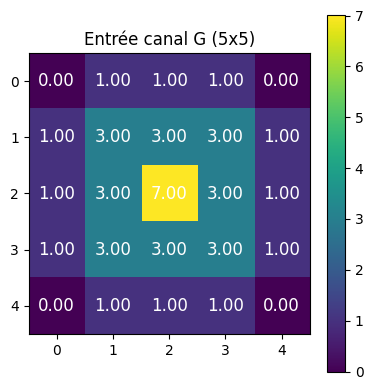

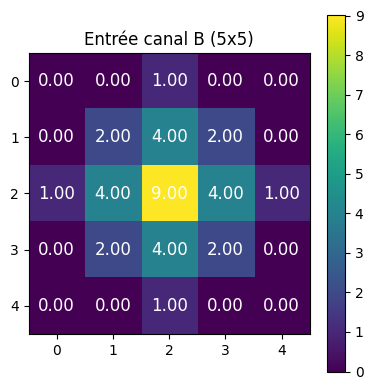

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import matplotlib.pyplot as plt

print("TensorFlow:", tf.__version__)

R = np.array([
    [0,0,0,0,0],
    [0,2,2,2,0],
    [0,2,5,2,0],
    [0,2,2,2,0],
    [0,0,0,0,0]
], dtype=np.float32)

G = np.array([
    [0,1,1,1,0],
    [1,3,3,3,1],
    [1,3,7,3,1],
    [1,3,3,3,1],
    [0,1,1,1,0]
], dtype=np.float32)

B = np.array([
    [0,0,1,0,0],
    [0,2,4,2,0],
    [1,4,9,4,1],
    [0,2,4,2,0],
    [0,0,1,0,0]
], dtype=np.float32)

x = np.stack([R, G, B], axis=-1)[None, ...]   # shape (1,5,5,3)
print("Input shape:", x.shape)

conv = layers.Conv2D(
    filters=1, kernel_size=(3,3),
    strides=(1,1), padding='valid',
    use_bias=False
)
model = Sequential([layers.Input(shape=(5,5,3)), conv])

# Choix du filtre
laplace = np.array([[ 0, -1,  0],
                    [-1,  4, -1],
                    [ 0, -1,  0]], dtype=np.float32)

mode = "laplace"

kernel = np.zeros((3,3,3,1), dtype=np.float32)
if mode == "laplace":
    for c in range(3):
        kernel[:,:,c,0] = laplace
else:
    rng = np.random.default_rng(42)
    kernel = rng.uniform(-0.5, 0.5, size=(3,3,3,1)).astype(np.float32)

conv.set_weights([kernel])

y = model(x).numpy()
feature_map = y[0,:,:,0]
print("Output shape:", y.shape)

def plot_matrix_with_values(mat, title):
    fig = plt.figure(figsize=(4,4))
    plt.imshow(mat, cmap='viridis')
    plt.title(title)
    plt.xticks(range(mat.shape[1]))
    plt.yticks(range(mat.shape[0]))
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            plt.text(j, i, f"{mat[i,j]:.2f}", ha='center', va='center', fontsize=12, color='white')
    plt.colorbar()
    plt.tight_layout()
    plt.show()

# 6) Visualisation des noyaux et de la feature map
plot_matrix_with_values(kernel[:,:,0,0], f"Noyau canal R (mode={mode})")
plot_matrix_with_values(kernel[:,:,1,0], f"Noyau canal G (mode={mode})")
plot_matrix_with_values(kernel[:,:,2,0], f"Noyau canal B (mode={mode})")
plot_matrix_with_values(feature_map, "Feature map (sortie 3x3)")

# 7) Visualisation des canaux d'entrée
plot_matrix_with_values(R, "Entrée canal R (5x5)")
plot_matrix_with_values(G, "Entrée canal G (5x5)")
plot_matrix_with_values(B, "Entrée canal B (5x5)")

Le Total params: 328,586 représente le nombre total de poids et biais dans votre réseau de neurones qui seraient ajustés pendant l'entraînement. les parametres du filtre sont le weight dans ce cas

TensorFlow: 2.19.0
Input shape: (1, 5, 5, 3)
Output shape after pooling: (1, 1, 1, 1)


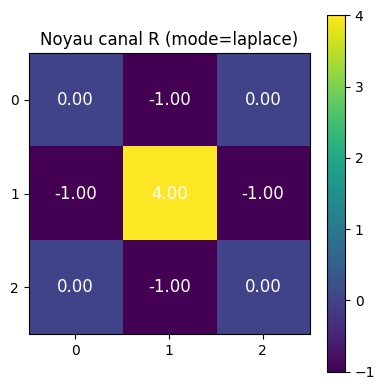

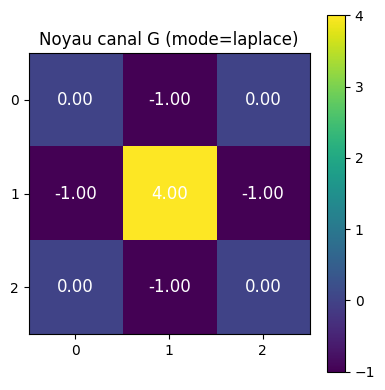

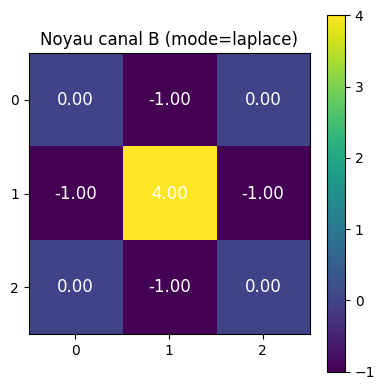

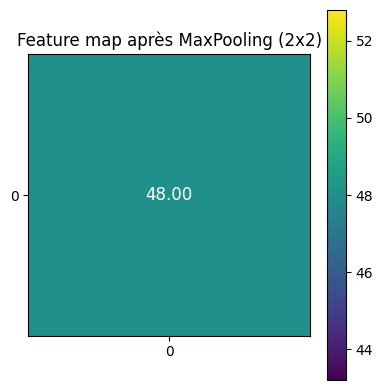

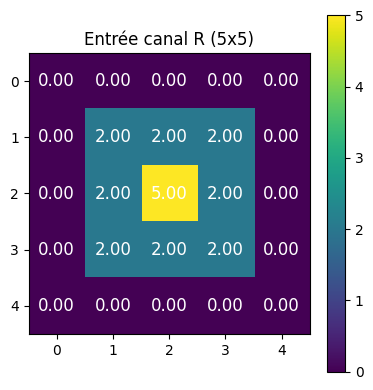

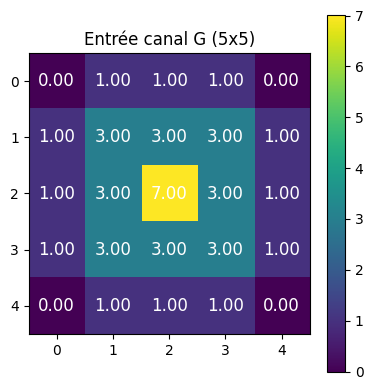

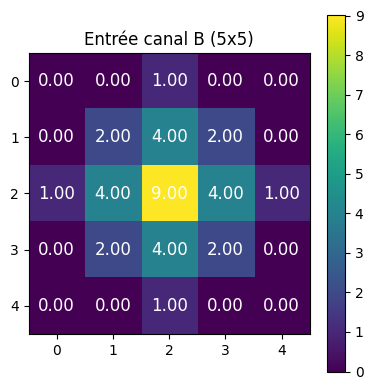

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import matplotlib.pyplot as plt

print("TensorFlow:", tf.__version__)

# --- 1) Création des canaux R, G, B ---
R = np.array([
    [0,0,0,0,0],
    [0,2,2,2,0],
    [0,2,5,2,0],
    [0,2,2,2,0],
    [0,0,0,0,0]
], dtype=np.float32)

G = np.array([
    [0,1,1,1,0],
    [1,3,3,3,1],
    [1,3,7,3,1],
    [1,3,3,3,1],
    [0,1,1,1,0]
], dtype=np.float32)

B = np.array([
    [0,0,1,0,0],
    [0,2,4,2,0],
    [1,4,9,4,1],
    [0,2,4,2,0],
    [0,0,1,0,0]
], dtype=np.float32)

x = np.stack([R, G, B], axis=-1)[None, ...]   # shape (1,5,5,3)
print("Input shape:", x.shape)

# --- 2) Définition du modèle ---
conv = layers.Conv2D(
    filters=1, kernel_size=(3,3),
    strides=(1,1), padding='valid',
    use_bias=False
)

# Ajout d'une seule couche MaxPooling2D
pool = layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')

model = Sequential([
    layers.Input(shape=(5,5,3)),
    conv,
    pool
])

# --- 3) Choix du filtre ---
laplace = np.array([[ 0, -1,  0],
                    [-1,  4, -1],
                    [ 0, -1,  0]], dtype=np.float32)

mode = "laplace"

kernel = np.zeros((3,3,3,1), dtype=np.float32)
if mode == "laplace":
    for c in range(3):
        kernel[:,:,c,0] = laplace
else:
    rng = np.random.default_rng(42)
    kernel = rng.uniform(-0.5, 0.5, size=(3,3,3,1)).astype(np.float32)

conv.set_weights([kernel])

# --- 4) Application du modèle ---
y = model(x).numpy()
pooled_feature_map = y[0,:,:,0]
print("Output shape after pooling:", y.shape)

# --- 5) Fonctions d’affichage ---
def plot_matrix_with_values(mat, title):
    fig = plt.figure(figsize=(4,4))
    plt.imshow(mat, cmap='viridis')
    plt.title(title)
    plt.xticks(range(mat.shape[1]))
    plt.yticks(range(mat.shape[0]))
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            plt.text(j, i, f"{mat[i,j]:.2f}", ha='center', va='center', fontsize=12, color='white')
    plt.colorbar()
    plt.tight_layout()
    plt.show()

# --- 6) Visualisation ---
plot_matrix_with_values(kernel[:,:,0,0], f"Noyau canal R (mode={mode})")
plot_matrix_with_values(kernel[:,:,1,0], f"Noyau canal G (mode={mode})")
plot_matrix_with_values(kernel[:,:,2,0], f"Noyau canal B (mode={mode})")

# Feature map après convolution et pooling
plot_matrix_with_values(pooled_feature_map, "Feature map après MaxPooling (2x2)")

# --- 7) Visualisation des canaux d’entrée ---
plot_matrix_with_values(R, "Entrée canal R (5x5)")
plot_matrix_with_values(G, "Entrée canal G (5x5)")
plot_matrix_with_values(B, "Entrée canal B (5x5)")


# Dataset MNIST

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


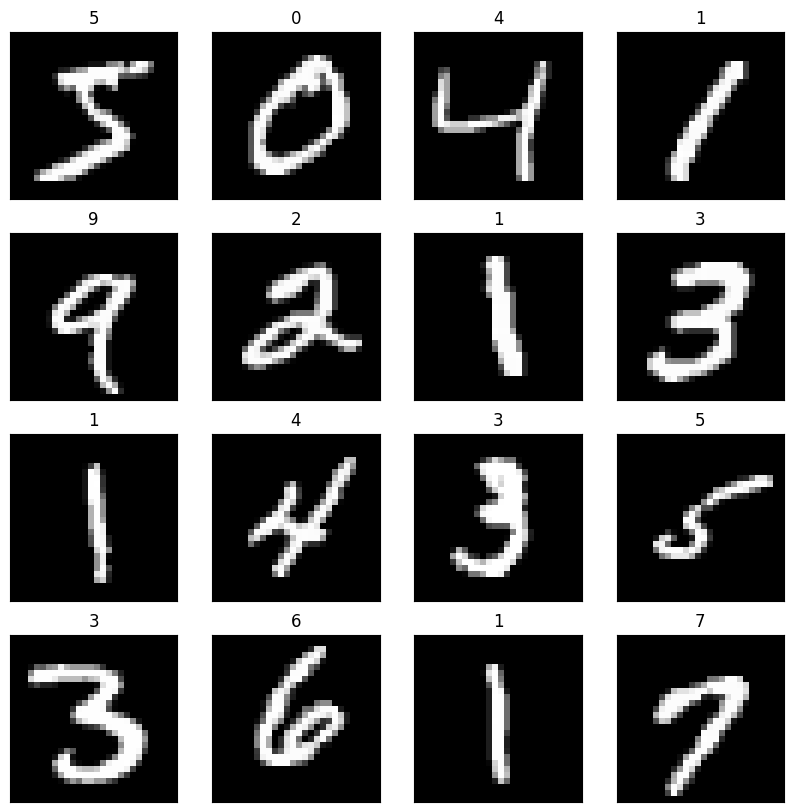

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.8957 - loss: 0.3334 - val_accuracy: 0.9862 - val_loss: 0.0413
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9843 - loss: 0.0487 - val_accuracy: 0.9876 - val_loss: 0.0362
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9901 - loss: 0.0323 - val_accuracy: 0.9906 - val_loss: 0.0282
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9917 - loss: 0.0261 - val_accuracy: 0.9900 - val_loss: 0.0300
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9947 - loss: 0.0171 - val_accuracy: 0.9909 - val_loss: 0.0273
313/313 - 2s - 5ms/step - accuracy: 0.9909 - loss: 0.0273

Précision sur les données de test : 0.9908999800682068


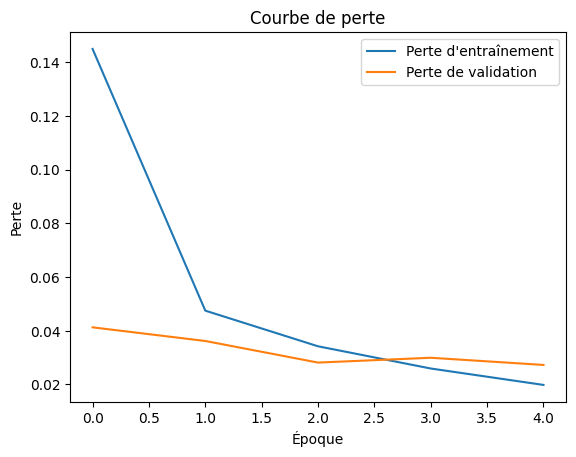

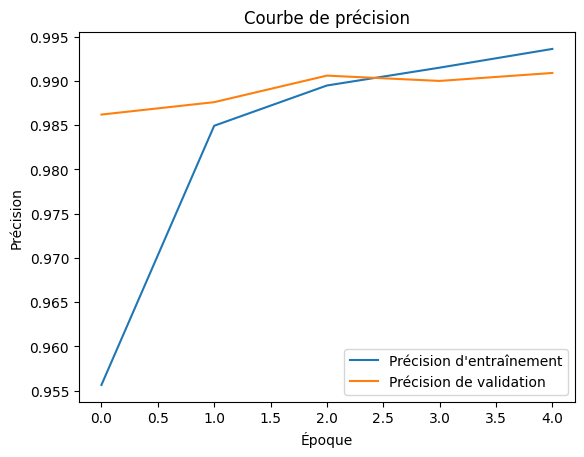

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


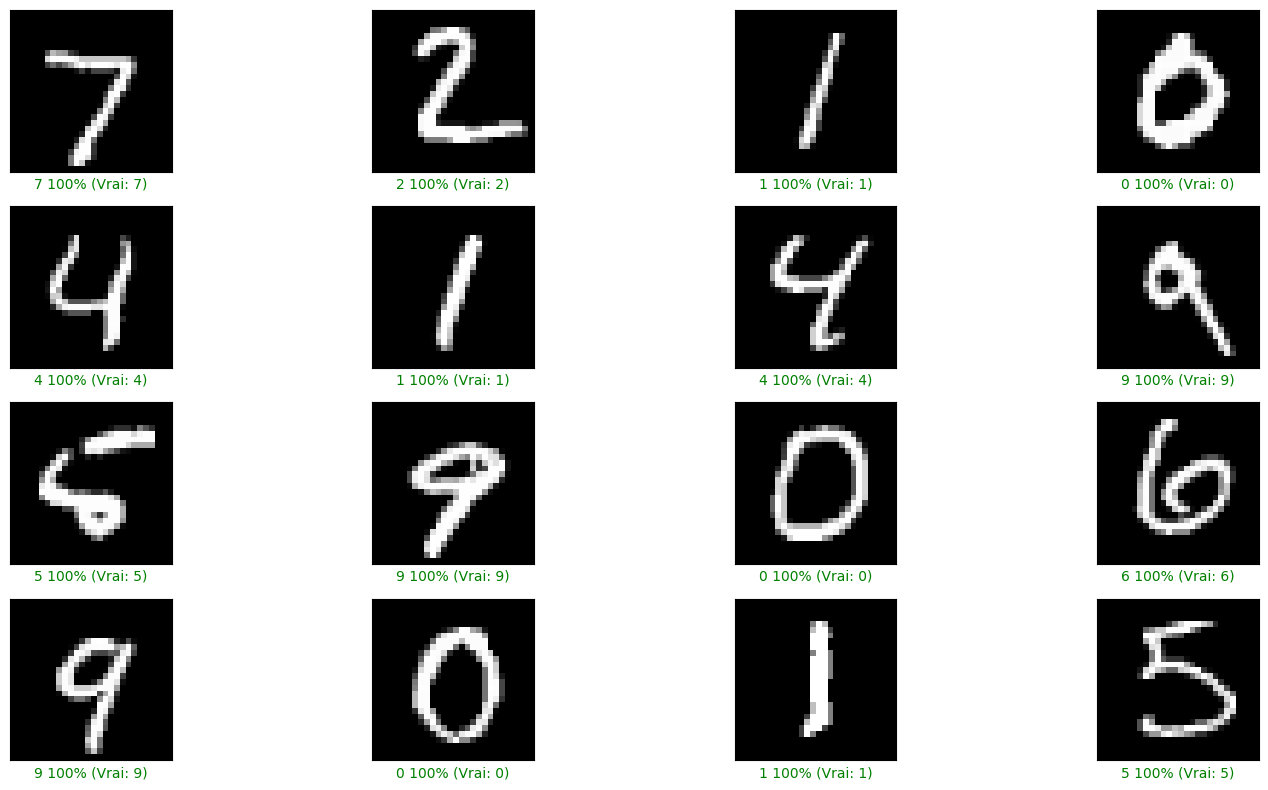

Shape des filtres: (3, 3, 1, 32)


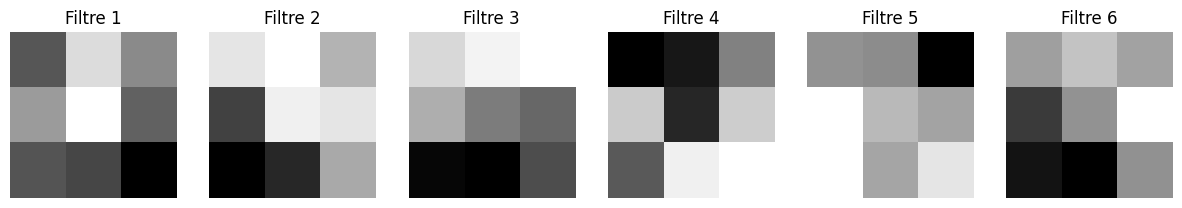

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Shape de l'activation de la première couche: (1, 26, 26, 32)


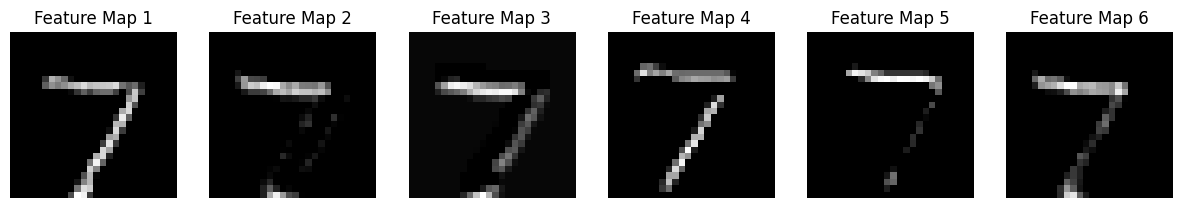

In [ ]:
# Importation des bibliothèques nécessaires
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# 1. Chargement et Prétraitement du Jeu de Données MNIST
# Charger le jeu de données MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Ajouter une dimension de canal pour les images en niveaux de gris
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normaliser les pixels entre 0 et 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# 2. Visualisation de Quelques Images du Jeu de Données
# Afficher quelques images du jeu d'entraînement
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28,28), cmap='gray')
    plt.title(class_names[train_labels[i]])
plt.show()

# 3. Construction de l'Architecture du CNN
model = models.Sequential()

# Première couche convolutionnelle et d'activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Première couche de pooling
model.add(layers.MaxPooling2D((2, 2)))

# Deuxième couche convolutionnelle et d'activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Deuxième couche de pooling
model.add(layers.MaxPooling2D((2, 2)))

# Troisième couche convolutionnelle et d'activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Aplatissement des cartes de caractéristiques
model.add(layers.Flatten())

# Couche entièrement connectée
model.add(layers.Dense(64, activation='relu'))

# Couche de sortie avec activation softmax
model.add(layers.Dense(10, activation='softmax'))

# Afficher le résumé du modèle
model.summary()

# 4. Compilation du Modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# 5. Entraînement du Modèle
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

# 6. Évaluation du Modèle sur les Données de Test
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nPrécision sur les données de test :', test_acc)

# 7. Visualisation des Courbes d'Apprentissage
# Courbe de Perte
plt.figure()
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.legend()
plt.title('Courbe de perte')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.show()

# Courbe de Précision
plt.figure()
plt.plot(history.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history.history['val_accuracy'], label='Précision de validation')
plt.legend()
plt.title('Courbe de précision')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.show()

# 8. Visualisation des Prédictions du Modèle
# Prédictions sur les données de test
predictions = model.predict(test_images)

# Fonction pour afficher l'image, la prédiction et le label réel
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape(28,28), cmap='gray')

    predicted_label = np.argmax(predictions_array)
    color = 'green' if predicted_label == true_label else 'red'

    plt.xlabel("{} {:2.0f}% (Vrai: {})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]), color=color)

# Afficher les 16 premières images avec les prédictions
num_rows = 4
num_cols = 4
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, predictions, test_labels, test_images)
plt.tight_layout()
plt.show()

# 9. Visualisation des Filtres Appris (Optionnel)
# Obtenir les poids de la première couche convolutionnelle
filters, biases = model.layers[0].get_weights()
print('Shape des filtres:', filters.shape)  # (3, 3, 1, 32)

# Normaliser les filtres pour l'affichage
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

n_filters = 6  # Nombre de filtres à afficher
plt.figure(figsize=(15, 5))
for i in range(n_filters):
    f = filters[:, :, 0, i]
    plt.subplot(1, n_filters, i+1)
    plt.imshow(f, cmap='gray')
    plt.axis('off')
    plt.title(f'Filtre {i+1}')
plt.show()

# 10. Visualisation des Activations des Couches (Correction)
# Sélectionner une image de test
image_index = 0
image = test_images[image_index]

# Créer un modèle qui renvoie les sorties des couches
layer_outputs = [layer.output for layer in model.layers[:6]]  # Couches convolutionnelles et de pooling
activation_model = models.Model(inputs=model.layers[0].input, outputs=layer_outputs)

# Obtenir les activations
activations = activation_model.predict(image.reshape(1, 28, 28, 1))

# Afficher les activations de la première couche
first_layer_activation = activations[0]
print('Shape de l\'activation de la première couche:', first_layer_activation.shape)

n_features = 6  # Nombre de cartes de caractéristiques à afficher
plt.figure(figsize=(15, 5))
for i in range(n_features):
    plt.subplot(1, n_features, i+1)
    plt.imshow(first_layer_activation[0, :, :, i], cmap='gray')
    plt.axis('off')
    plt.title(f'Feature Map {i+1}')
plt.show()


In [ ]:
# Sauvegarde complète du modèle
model.save('mnist_cnn_model.h5')


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('mnist_cnn_model.h5')

# Fashion MNIST

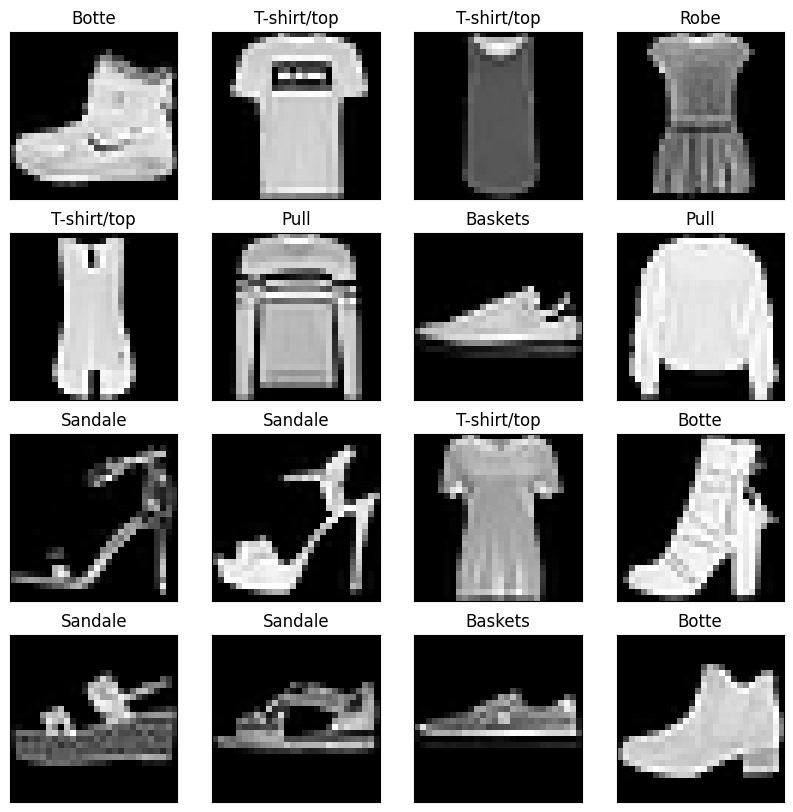

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.7390 - loss: 0.7152 - val_accuracy: 0.8630 - val_loss: 0.3815
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.8754 - loss: 0.3444 - val_accuracy: 0.8800 - val_loss: 0.3368
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8957 - loss: 0.2892 - val_accuracy: 0.8929 - val_loss: 0.3076
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9069 - loss: 0.2537 - val_accuracy: 0.8997 - val_loss: 0.2762
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9137 - loss: 0.2291 - val_accuracy: 0.9010 - val_loss: 0.2735
313/313 - 2s - 6ms/step - accuracy: 0.9010 - loss: 0.2735

Précision sur les données de test : 0.9010000228881836


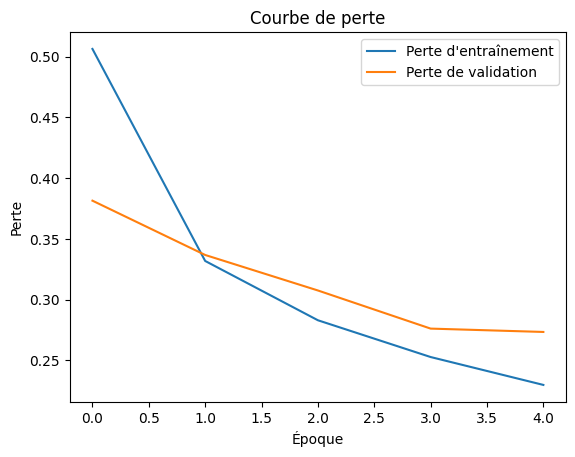

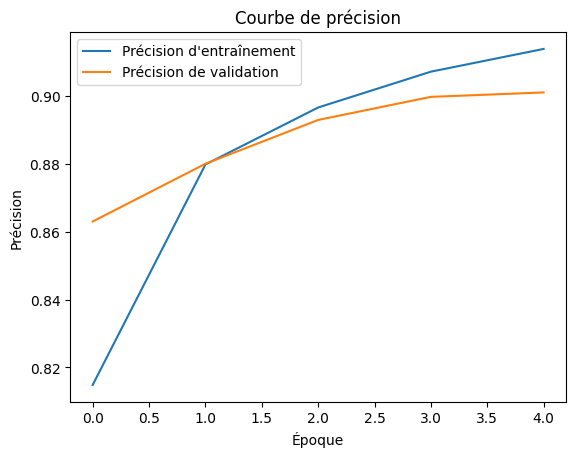

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


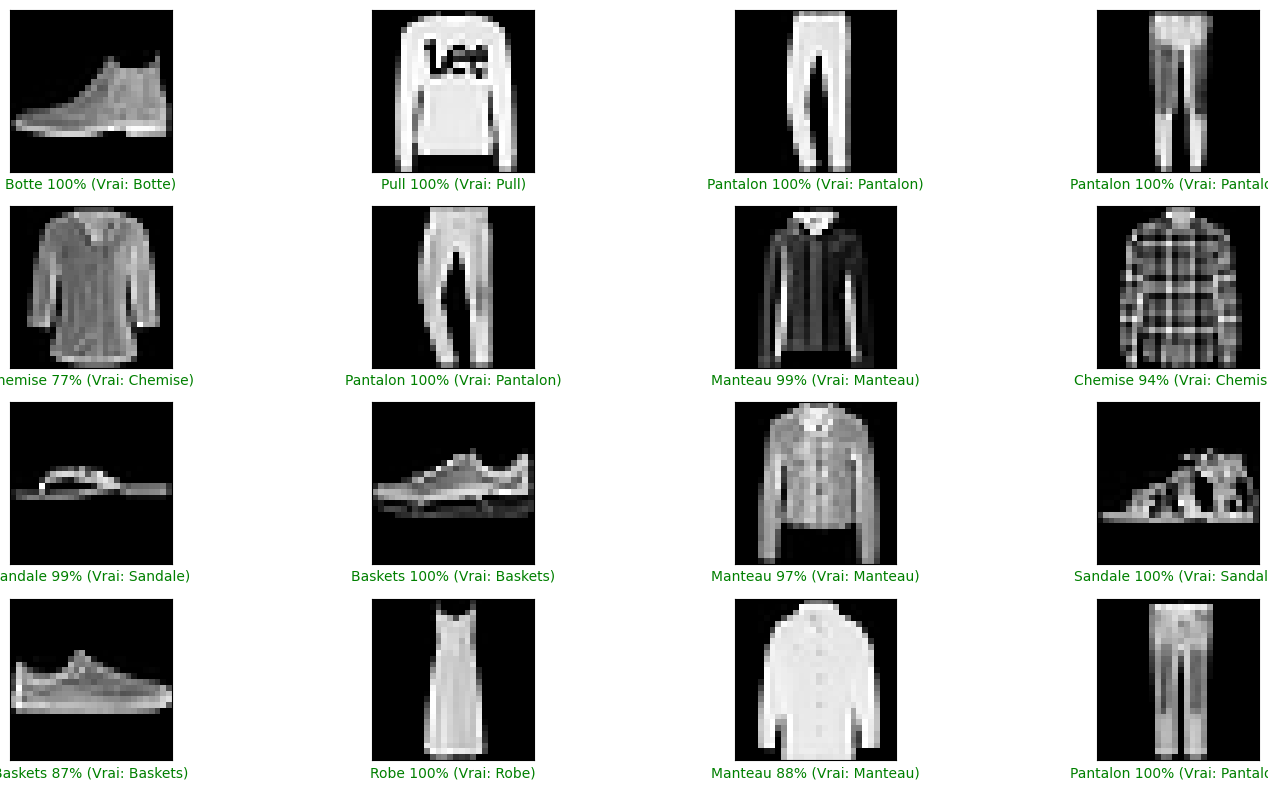

Shape des filtres: (3, 3, 1, 32)


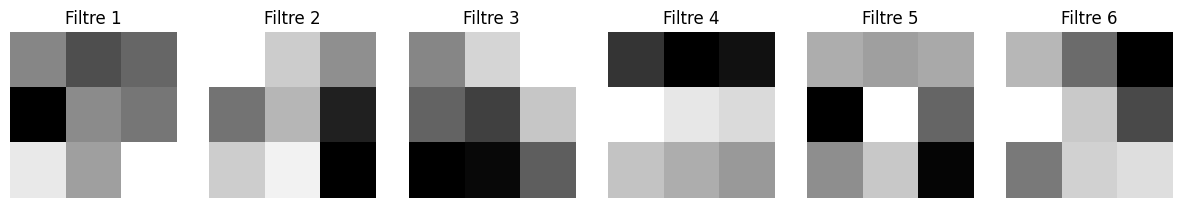

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Shape de l'activation de la première couche: (1, 26, 26, 32)


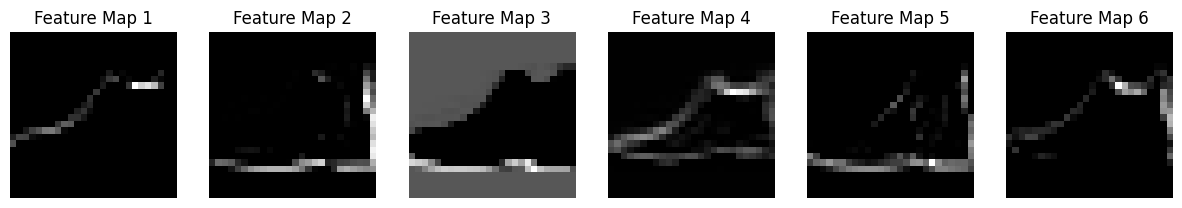

✅ Modèle sauvegardé sous le nom 'fashion_mnist_cnn_model.h5'


🎯 Précision du modèle chargé : 0.9010000228881836


In [ ]:
# ==========================================
# Importation des bibliothèques nécessaires
# ==========================================
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# 1. Chargement et Prétraitement du Jeu de Données Fashion-MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Ajouter une dimension de canal pour les images en niveaux de gris
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normaliser les pixels entre 0 et 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# 2. Visualisation de Quelques Images du Jeu de Données
class_names = ['T-shirt/top', 'Pantalon', 'Pull', 'Robe', 'Manteau',
               'Sandale', 'Chemise', 'Baskets', 'Sac', 'Botte']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.imshow(train_images[i].reshape(28,28), cmap='gray')
    plt.title(class_names[train_labels[i]])
plt.show()

# 3. Construction de l'Architecture du CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Afficher le résumé du modèle
model.summary()

# 4. Compilation du Modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Entraînement du Modèle
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

# 6. Évaluation du Modèle sur les Données de Test
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nPrécision sur les données de test :', test_acc)

# 7. Visualisation des Courbes d'Apprentissage
plt.figure()
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.legend()
plt.title('Courbe de perte')
plt.xlabel('Époque'); plt.ylabel('Perte')
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history.history['val_accuracy'], label='Précision de validation')
plt.legend()
plt.title('Courbe de précision')
plt.xlabel('Époque'); plt.ylabel('Précision')
plt.show()

# 8. Visualisation des Prédictions du Modèle
predictions = model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([]); plt.yticks([])
    plt.imshow(img.reshape(28,28), cmap='gray')

    predicted_label = np.argmax(predictions_array)
    color = 'green' if predicted_label == true_label else 'red'

    plt.xlabel("{} {:2.0f}% (Vrai: {})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]), color=color)

num_rows, num_cols = 4, 4
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_rows*num_cols):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, predictions, test_labels, test_images)
plt.tight_layout()
plt.show()

# 9. Visualisation des Filtres Appris
filters, biases = model.layers[0].get_weights()
print('Shape des filtres:', filters.shape)

f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

n_filters = 6
plt.figure(figsize=(15, 5))
for i in range(n_filters):
    f = filters[:, :, 0, i]
    plt.subplot(1, n_filters, i+1)
    plt.imshow(f, cmap='gray')
    plt.axis('off')
    plt.title(f'Filtre {i+1}')
plt.show()

# 10. Visualisation des Activations des Couches
image_index = 0
image = test_images[image_index]

layer_outputs = [layer.output for layer in model.layers[:6]]
activation_model = models.Model(inputs=model.layers[0].input, outputs=layer_outputs)
activations = activation_model.predict(image.reshape(1, 28, 28, 1))

first_layer_activation = activations[0]
print('Shape de l\'activation de la première couche:', first_layer_activation.shape)

n_features = 6
plt.figure(figsize=(15, 5))
for i in range(n_features):
    plt.subplot(1, n_features, i+1)
    plt.imshow(first_layer_activation[0, :, :, i], cmap='gray')
    plt.axis('off')
    plt.title(f'Feature Map {i+1}')
plt.show()

# ==========================================
# 11. SAUVEGARDE DU MODÈLE
# ==========================================

# Méthode 1 : sauvegarde complète au format HDF5
model.save('fashion_mnist_cnn_model.h5')
print("✅ Modèle sauvegardé sous le nom 'fashion_mnist_cnn_model.h5'")

# (Optionnel) Méthode 2 : format TensorFlow (dossier)
# model.save('fashion_mnist_cnn_model')

# ==========================================
# 12. CHARGEMENT DU MODÈLE POUR TESTER
# ==========================================
from tensorflow.keras.models import load_model
model_loaded = load_model('fashion_mnist_cnn_model.h5')

# Vérification du modèle chargé
test_loss, test_acc = model_loaded.evaluate(test_images, test_labels, verbose=0)
print("🎯 Précision du modèle chargé :", test_acc)
